## Data Preparation and Preprocessing

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install sklearn
! pip install xgboost

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [2]:
! pip install scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

In [4]:
! pip install openpyxl

In [ ]:
data_0 = pd.read_excel("model/Crop_recommendation.xlsx")

In [6]:
data = data_0.copy()

In [7]:
data.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,0.000000,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [8]:
data.describe()

,rainfall
count,2200.000000
mean,102.961693
std,55.109932
min,0.000000
25%,64.236408
50%,94.651497
75%,123.026982
max,298.560117


In [9]:
data.dtypes

N               object
P               object
K               object
temperature     object
humidity        object
ph              object
rainfall       float64
label           object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   object 
 1   P            2200 non-null   object 
 2   K            2194 non-null   object 
 3   temperature  2200 non-null   object 
 4   humidity     2200 non-null   object 
 5   ph           2186 non-null   object 
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(1), object(7)
memory usage: 137.6+ KB


In [11]:
print([x for x in data.N if type(x) != int])

[' ?', ' ?', ' ?', '?', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '?', ' ?', ' ?', ' ?', ' ?', '?', '?', ' ?', '? ', '? ', '? ', ' ?', ' ?', ' ?']


We see that alot of values as non numeric and contains '?' instead of null. So we replace the ? with null values.

In [12]:
data.replace("?",np.nan,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16596\1728890377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("?",np.nan,inplace=True)


In [13]:
data.replace(" ?",np.nan,inplace=True)

In [14]:
data.replace("? ",np.nan,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16596\1085821225.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("? ",np.nan,inplace=True)


In [15]:
data.isnull().sum()

N               39
P               96
K              141
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [16]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2161.000000,2104.000000,2059.000000,2199.000000,2199.000000,2185.000000,2200.000000
mean,50.366960,53.672053,49.055367,25.619664,71.254084,6.470420,102.961693
std,37.173779,33.475591,52.020468,5.062358,22.614824,0.774668,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,28.000000,21.000000,22.770560,60.124723,5.972715,64.236408
50%,37.000000,52.000000,32.000000,25.600337,80.457444,6.425420,94.651497
75%,85.000000,68.000000,50.000000,28.561810,89.935793,6.924042,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
data.describe(include="O")

,label
count,2200
unique,22
top,rice
freq,100


In [18]:
(data['N'] == 0).sum()

42

Some the columns contain 0 which doesn't make sense here. For example there is always some Nitroten amount and hence it can't be 0.

In [19]:
data['N'].replace(0, data.loc[data['N'] != 0, 'N'].mean(), inplace=True)
data['P'].replace(0, data.loc[data['P'] != 0, 'P'].mean(), inplace=True)
data['K'].replace(0, data.loc[data['K'] != 0, 'K'].mean(), inplace=True)
data['temperature'].replace(0, data.loc[data['temperature'] != 0, 'temperature'].mean(), inplace=True)
data['humidity'].replace(0, data.loc[data['humidity'] != 0, 'humidity'].mean(), inplace=True)
data['ph'].replace(0, data.loc[data['ph'] != 0, 'ph'].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16596\2443749865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['N'].replace(0, data.loc[data['N'] != 0, 'N'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_16596\2443749865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [20]:
data.fillna(data['N'].mean(),inplace=True)
data.fillna(data['P'].mean(),inplace=True)
data.fillna(data['K'].mean(),inplace=True)
data.fillna(data['temperature'].mean(),inplace=True)
data.fillna(data['humidity'].mean(),inplace=True)
data.fillna(data['ph'].mean(),inplace=True)

In [21]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [22]:
plt.rcParams['font.size'] = '16'

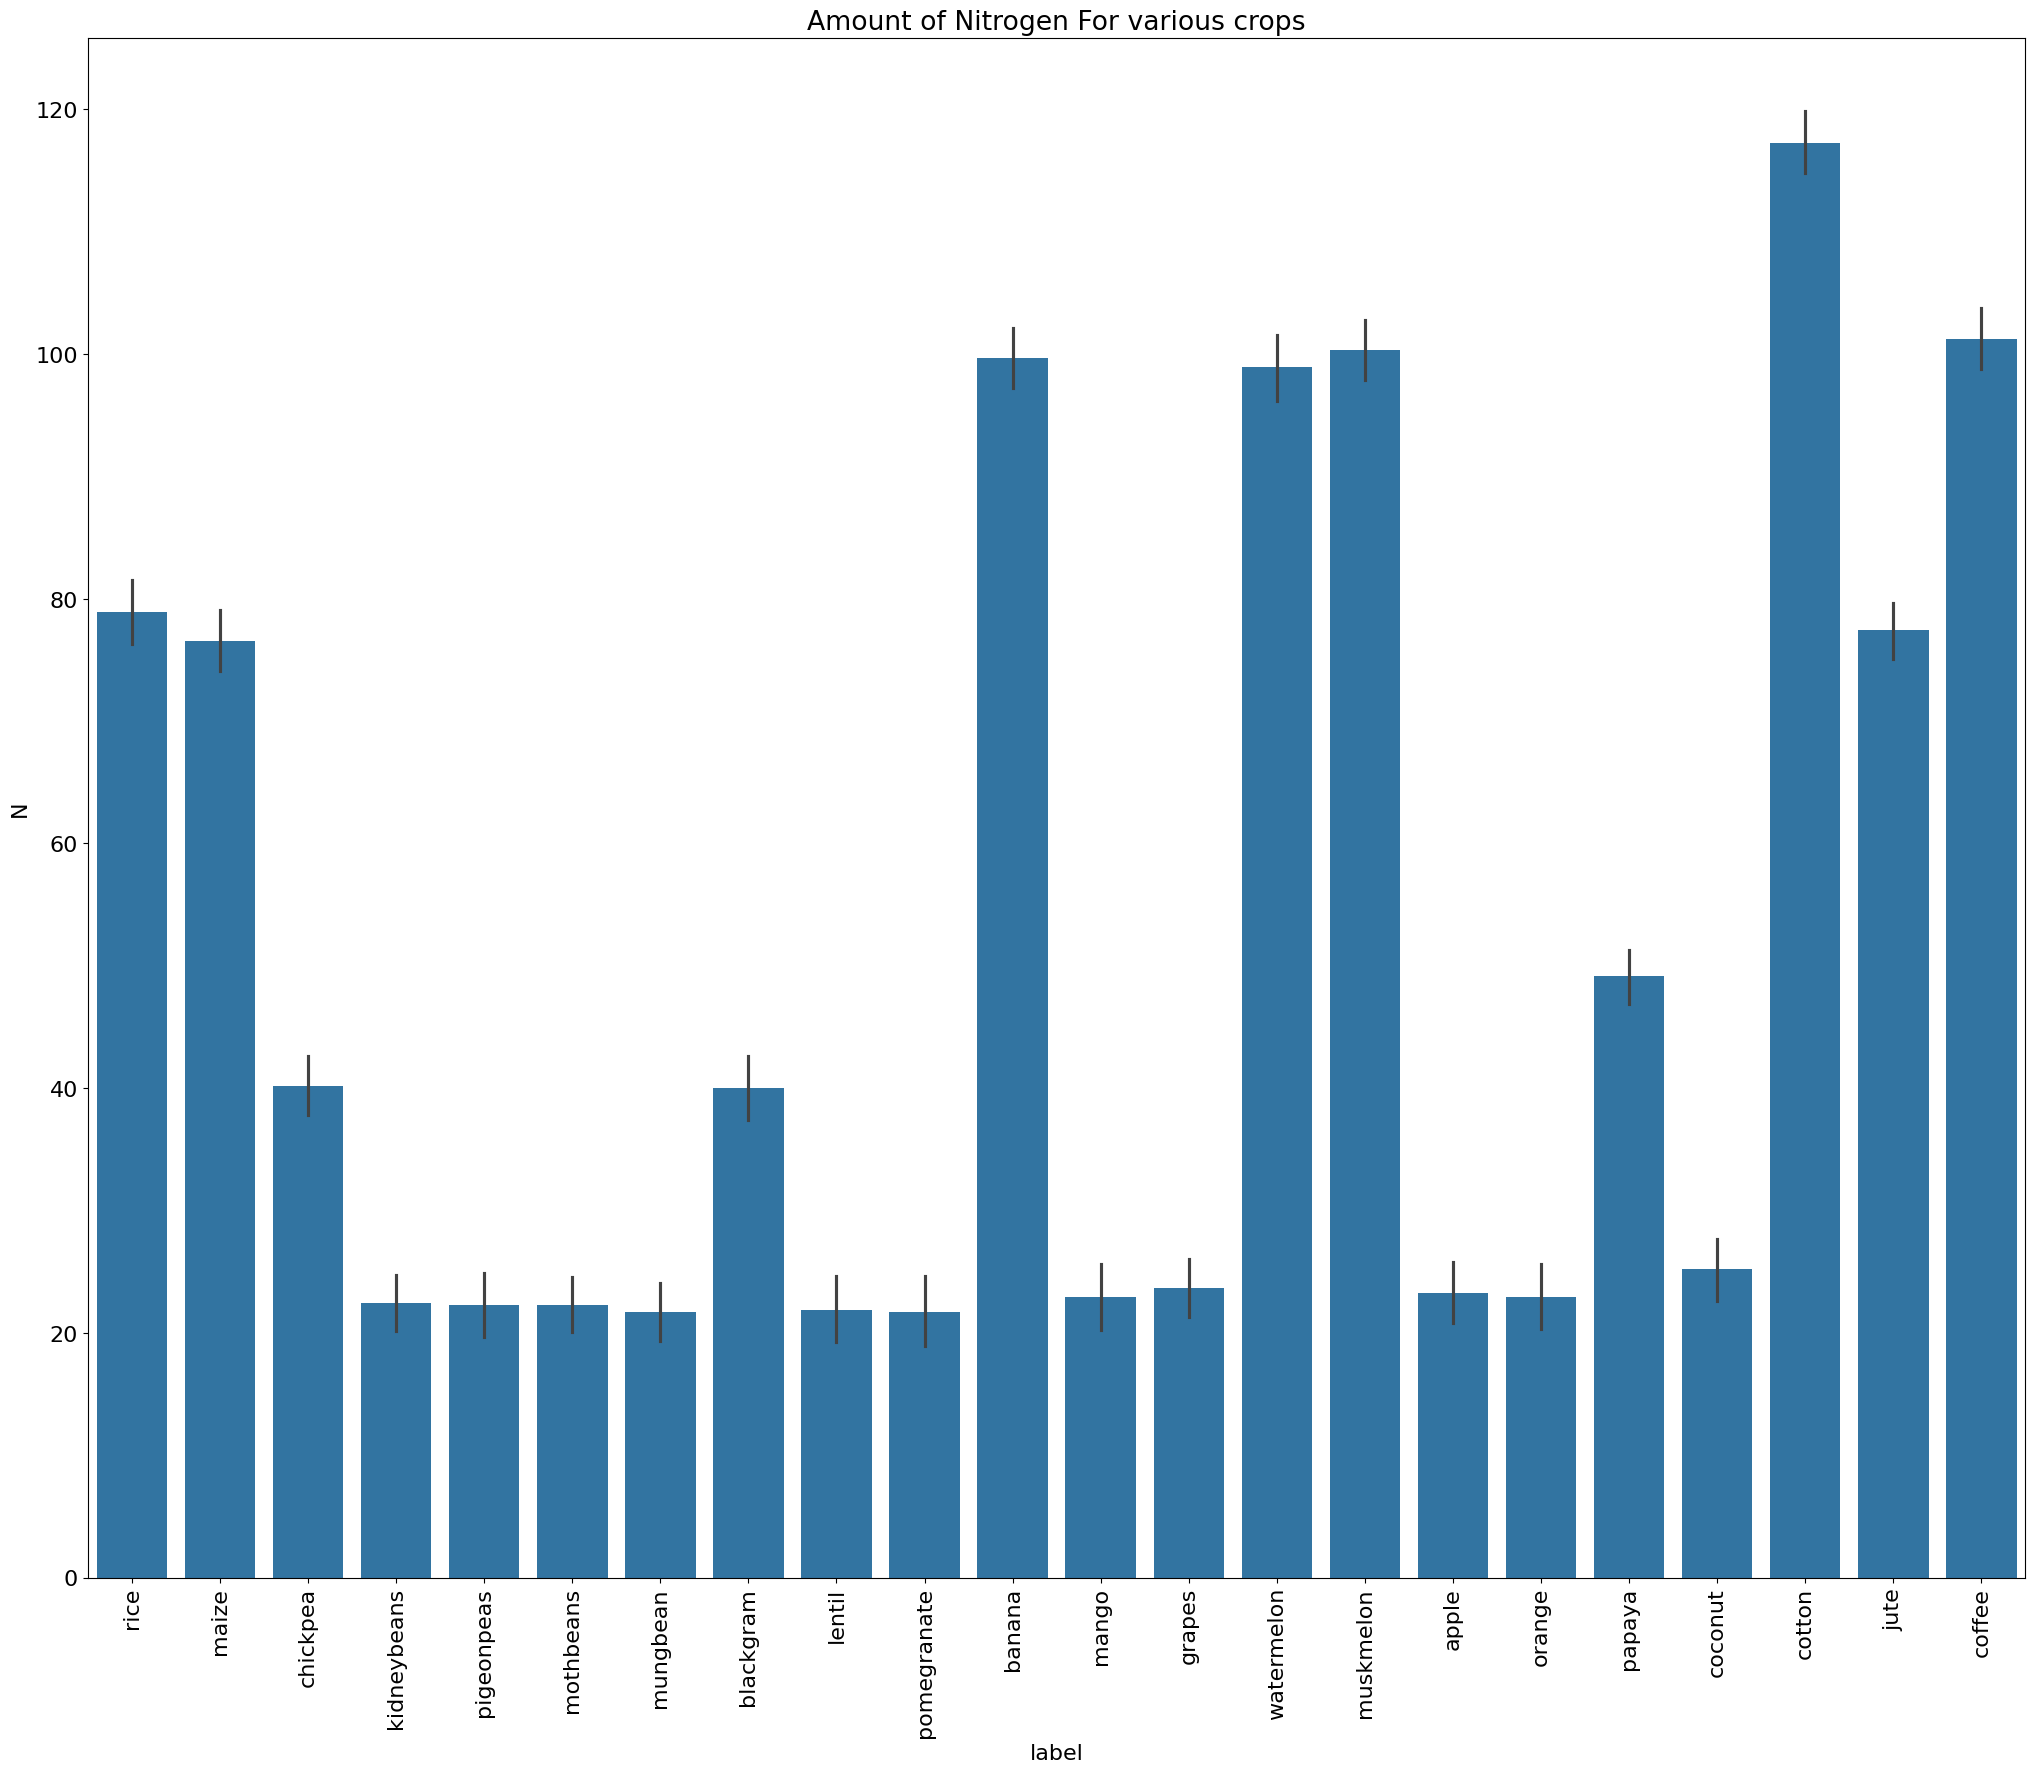

In [23]:
plt.figure(figsize=(25,20))
sns.barplot(x="label",y="N",data=data)
plt.xticks(rotation=90)
plt.title('Amount of Nitrogen For various crops');

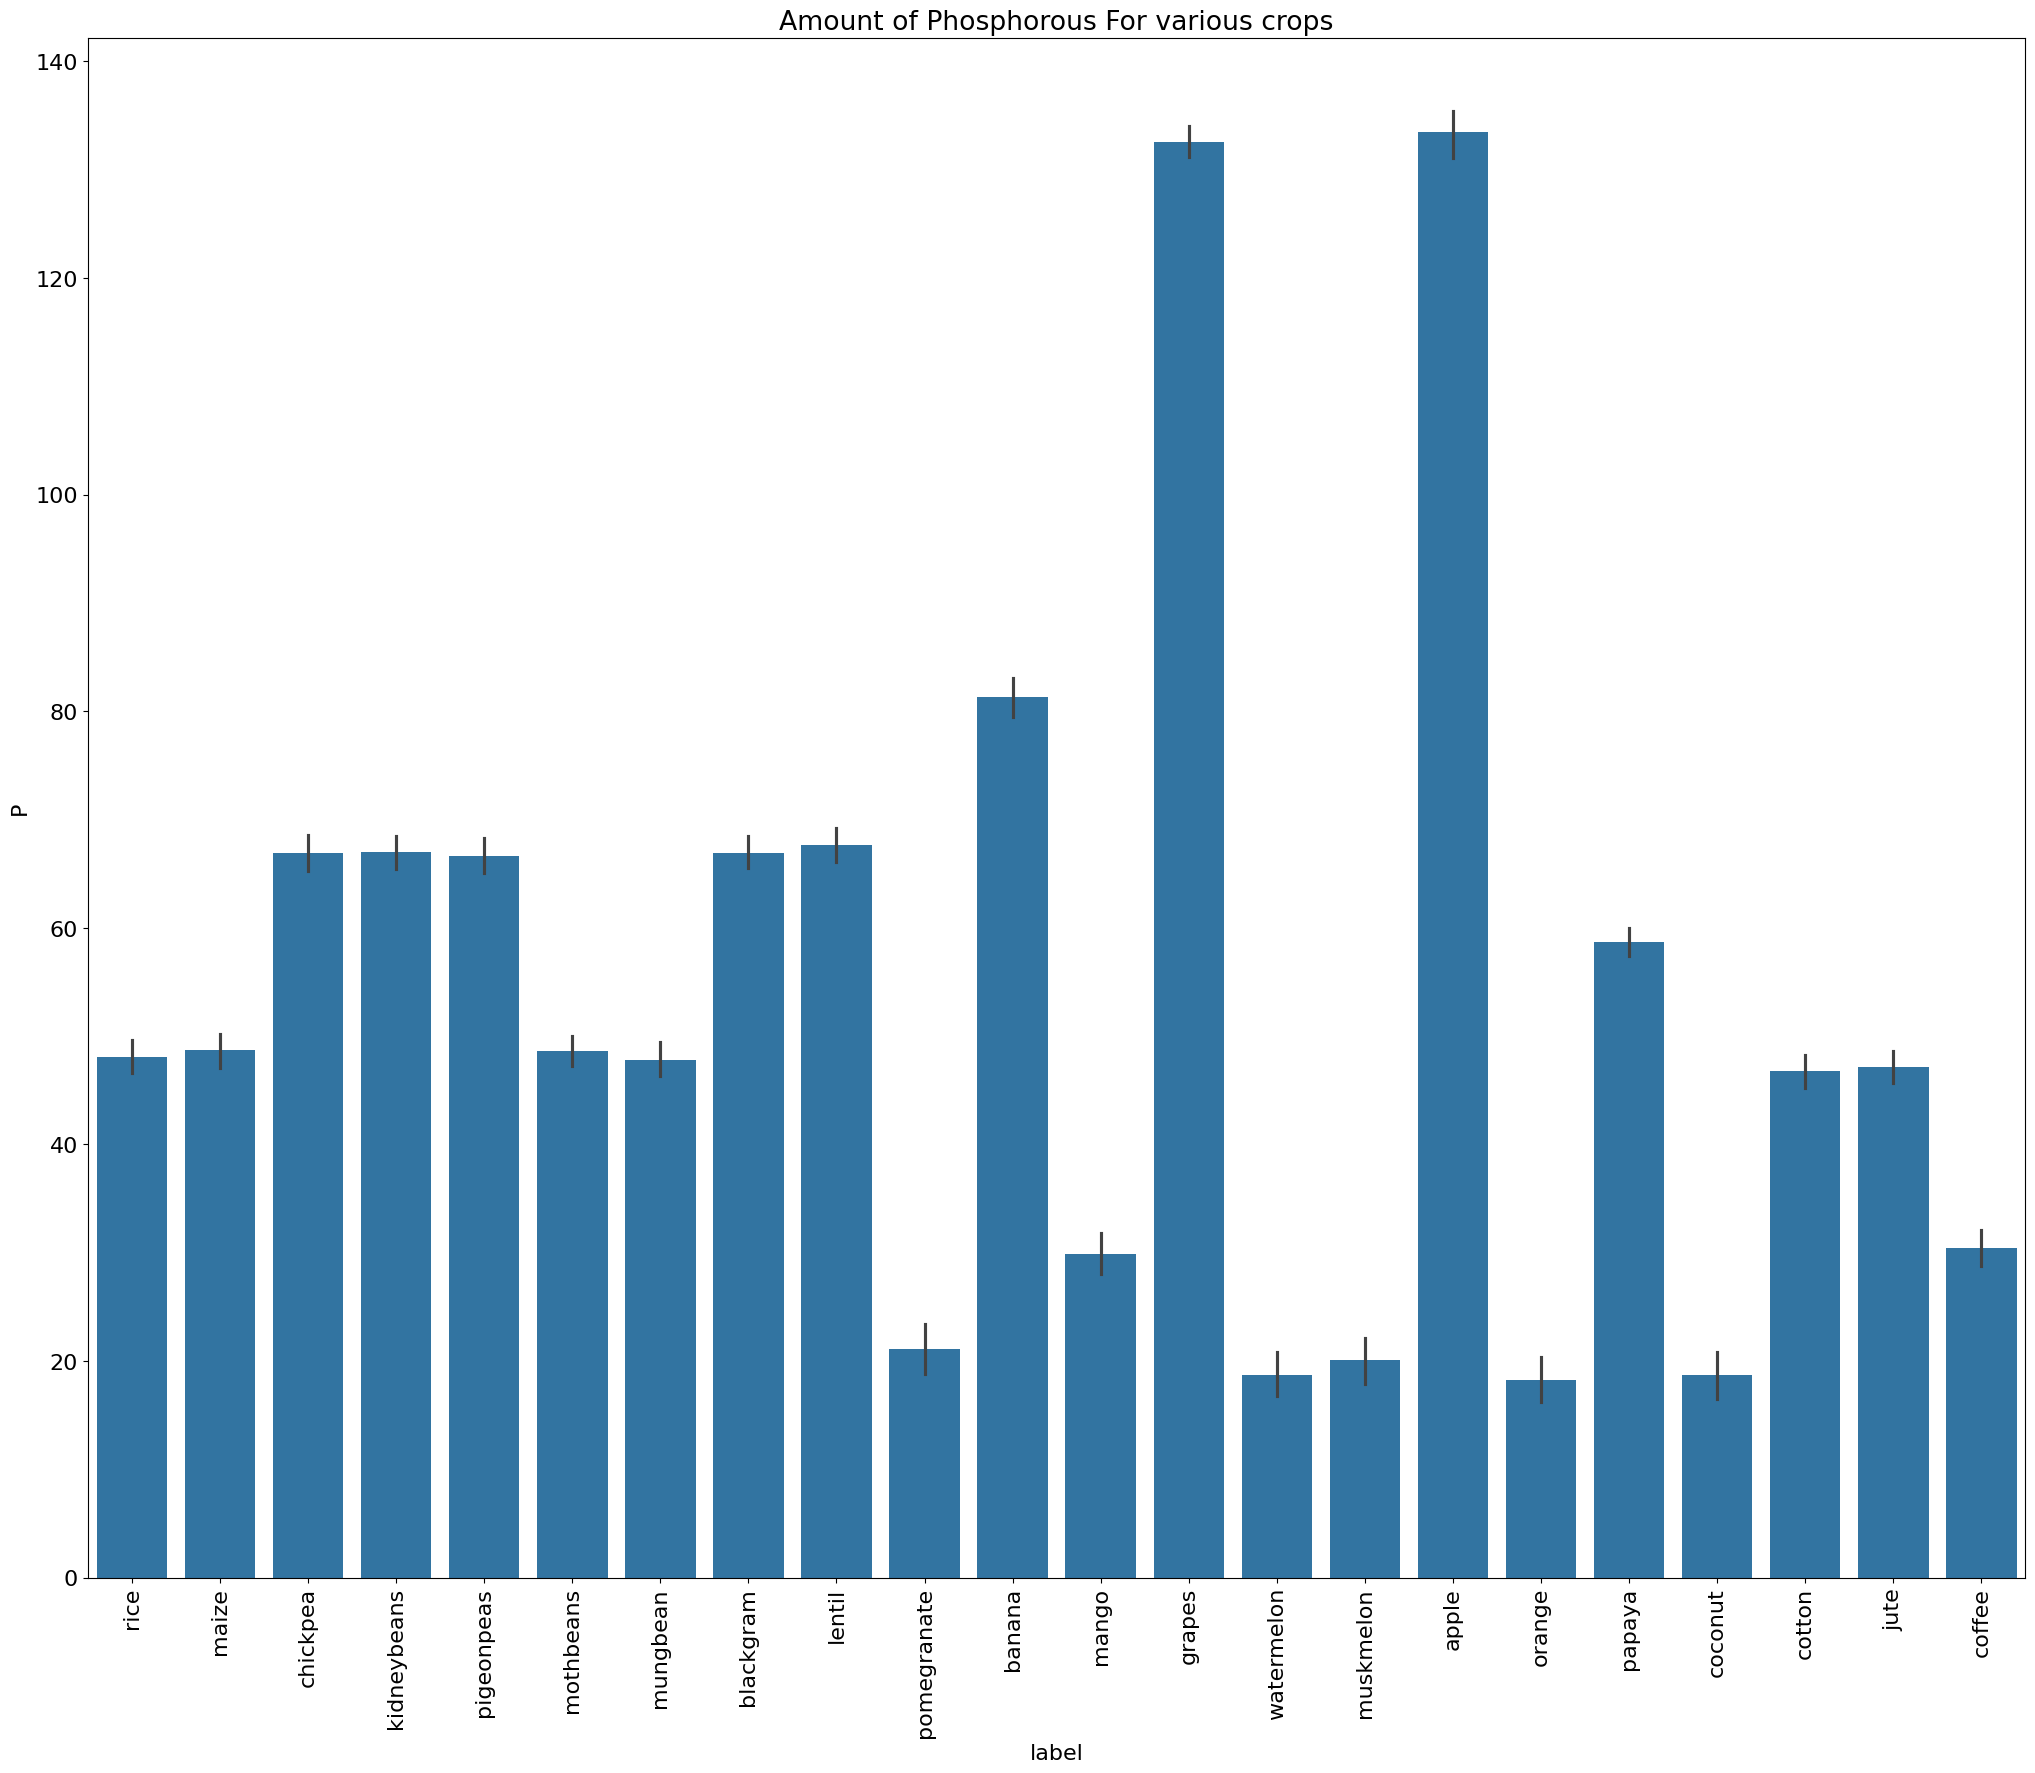

In [24]:
plt.figure(figsize=(25,20))
sns.barplot(x="label",y="P",data=data)
plt.xticks(rotation=90)
plt.title('Amount of Phosphorous For various crops');

In [25]:
plt.rcParams['font.size'] = '10'

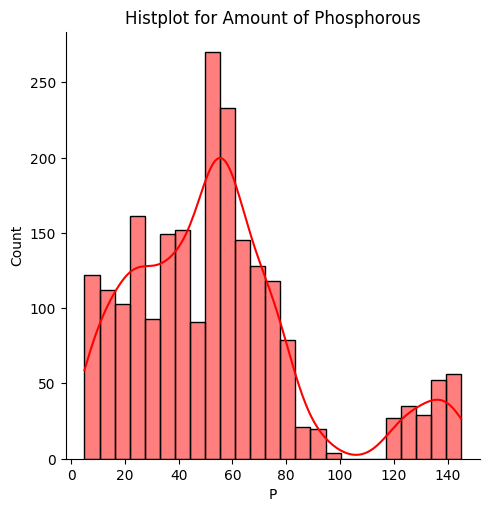

In [26]:
sns.displot(data["P"],color='r',kde=True)
plt.title('Histplot for Amount of Phosphorous');

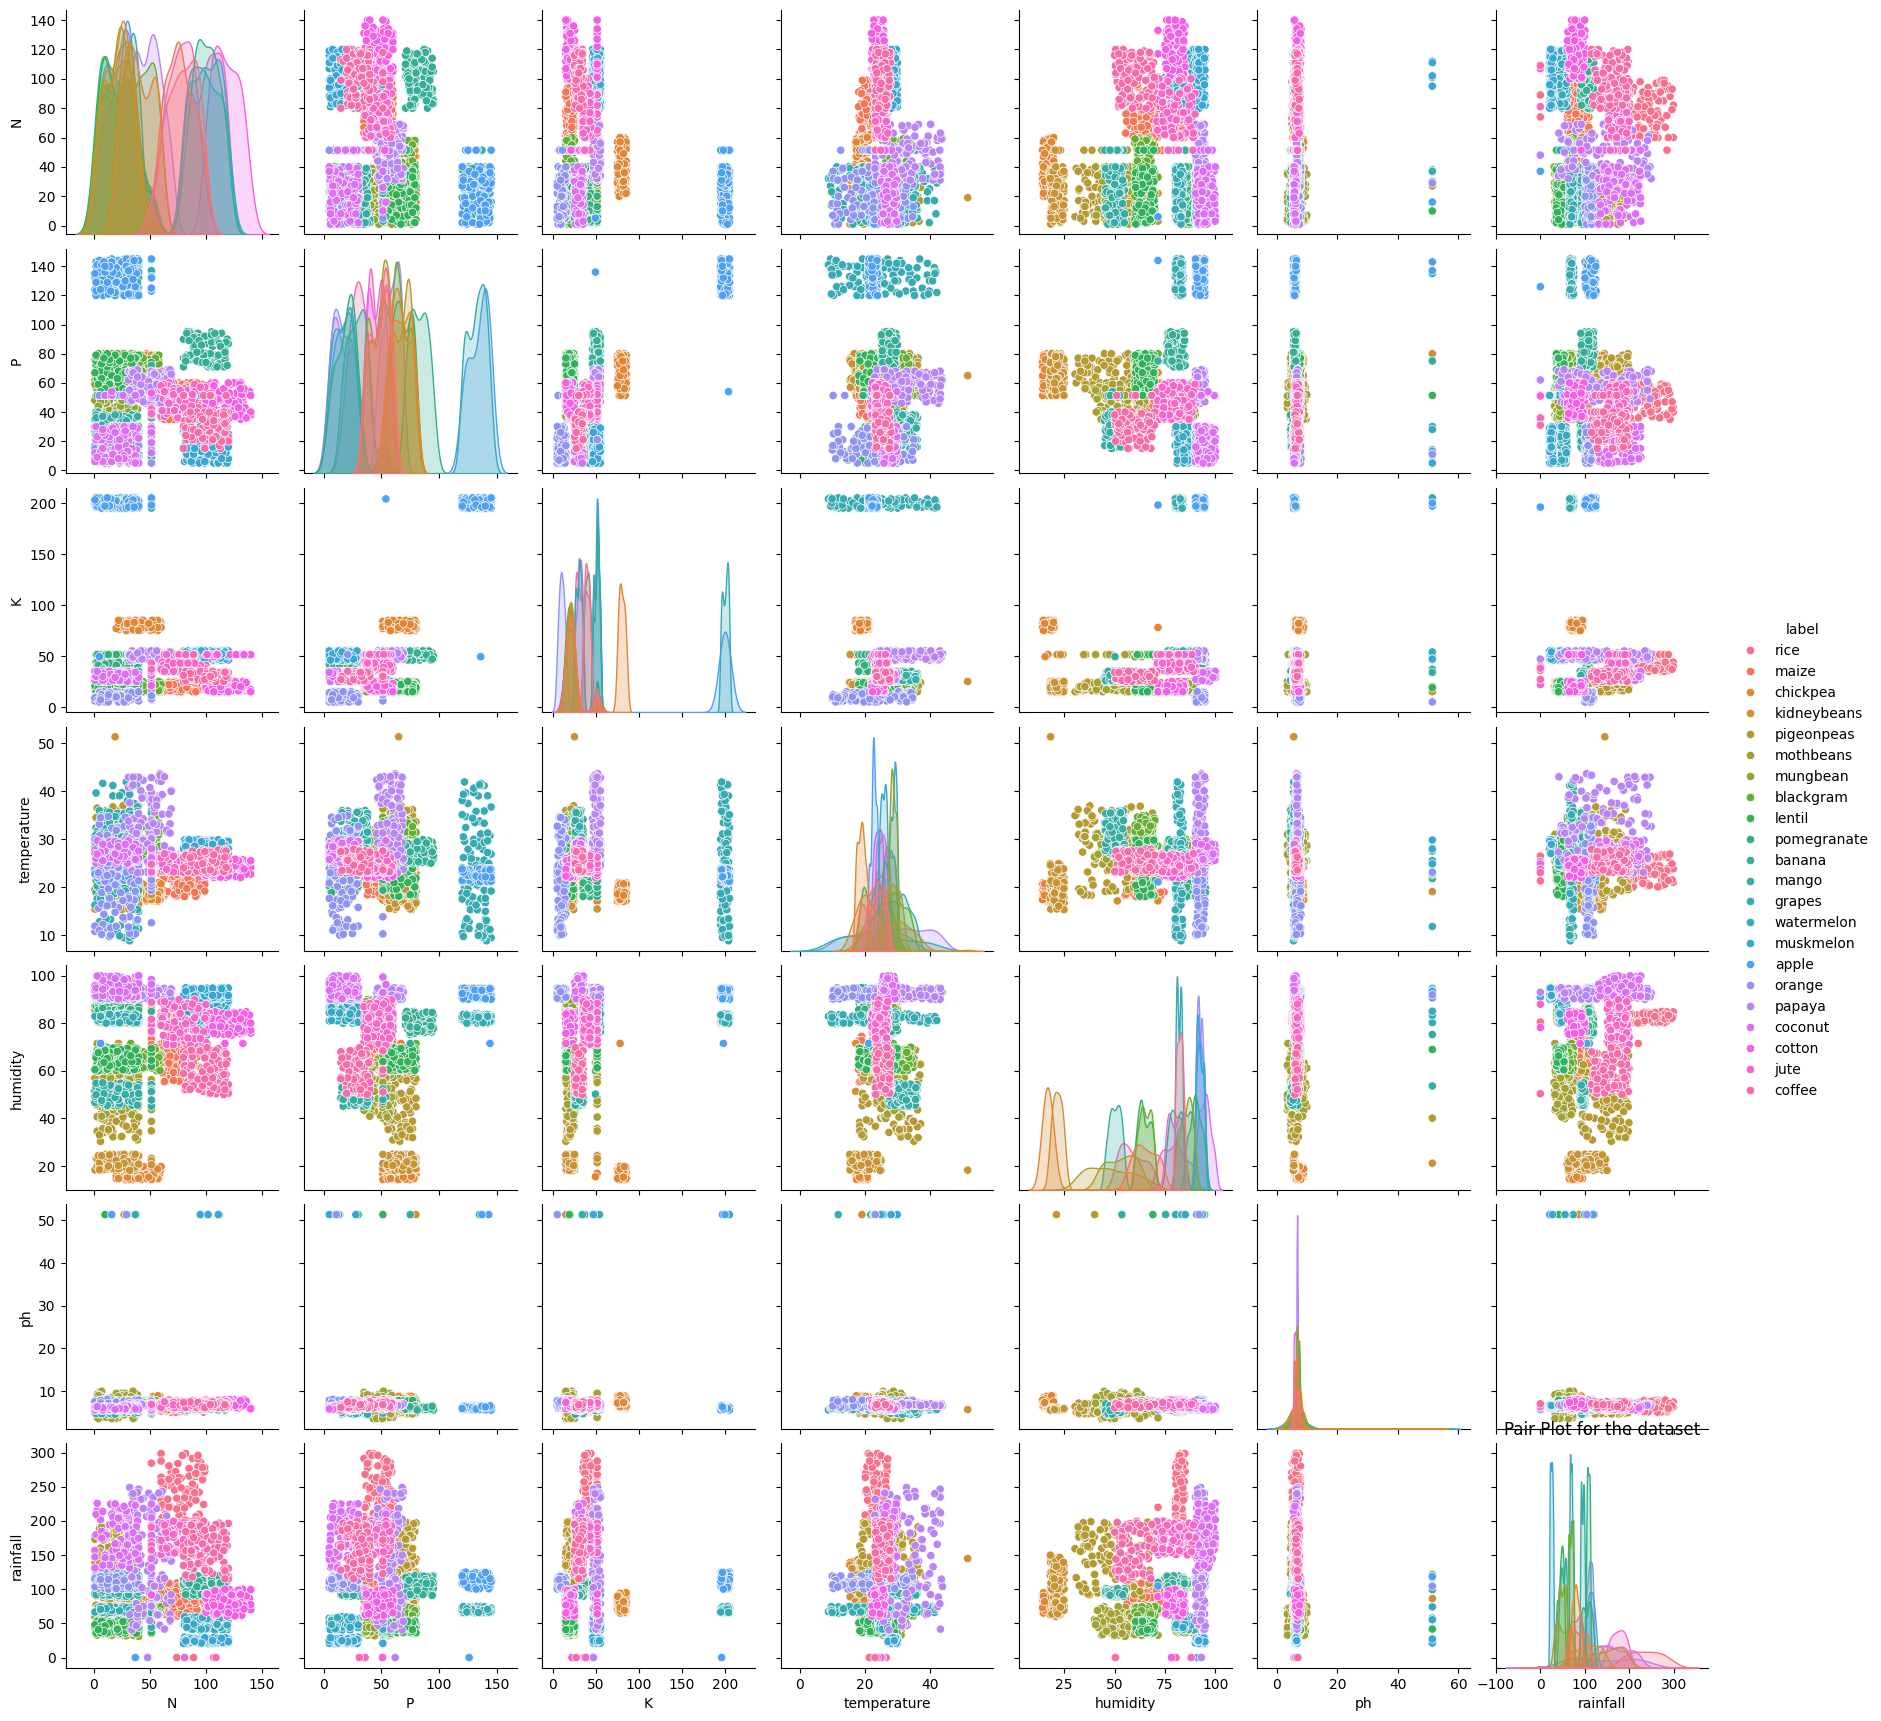

In [27]:
sns.pairplot(data=data,hue='label')
plt.title('Pair Plot for the dataset');

In [28]:
data.duplicated().sum()

0

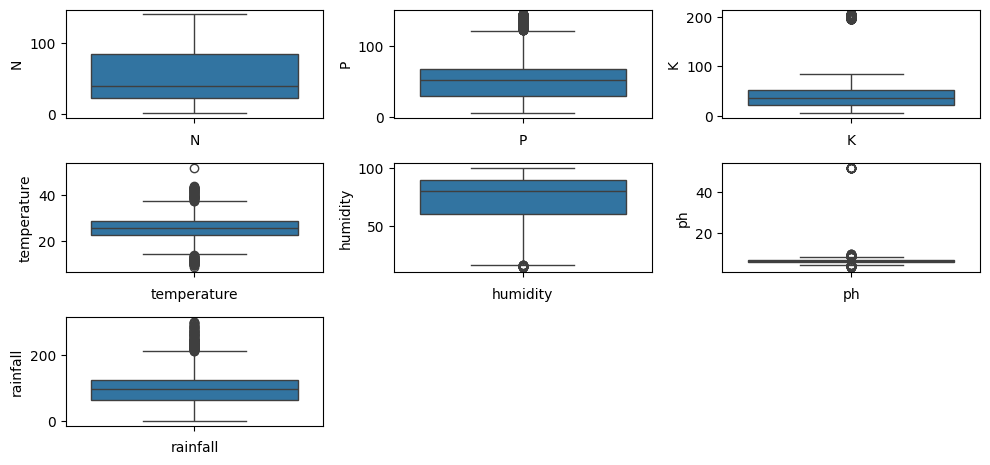

In [29]:
plt.figure(figsize=(10,6))
plotnumber=1

for column in data:
    if plotnumber<=7:
        ax=plt.subplot(4,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=10)

    plotnumber+=1
plt.tight_layout()

In [30]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,51.365267,53.865829,49.450005,25.631366,71.505095,6.776521,102.961693
std,36.165851,32.498748,50.207181,5.090885,22.200091,3.775036,55.109932
min,1.000000,5.000000,5.000000,8.825675,14.258040,3.504752,0.000000
25%,22.000000,30.000000,21.000000,22.770662,60.275383,5.977138,64.236408
50%,39.000000,51.365267,35.000000,25.600938,80.454379,6.430151,94.651497
75%,84.000000,67.000000,51.365267,28.563593,89.935185,6.932434,123.026982
max,140.000000,145.000000,205.000000,51.365267,99.981876,51.365267,298.560117


## Construction and Evaluation of Models

In [31]:
Lc=LabelEncoder()
data.label=Lc.fit_transform(data['label'])

In [32]:
Crop_Mappings = dict(zip(Lc.classes_, Lc.transform(Lc.classes_)))
print('Crop_Mappings: \n', Crop_Mappings, sep='')

Crop_Mappings: 
{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [33]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.000000,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.000000,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,49.318848,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.000000,26.491096,80.158363,6.980401,0.000000,20
4,78.0,42.0,42.000000,20.130175,81.604873,7.628473,262.717340,20


In [34]:
tc = data.corr()
tc

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.239158,-0.141047,0.024073,0.193001,0.031104,0.052186,-0.031884
P,-0.239158,1.000000,0.741041,-0.123182,-0.108420,-0.029955,-0.064292,-0.484275
K,-0.141047,0.741041,1.000000,-0.160480,0.185250,-0.004019,-0.062278,-0.344220
temperature,0.024073,-0.123182,-0.160480,1.000000,0.195213,-0.027547,-0.024984,0.112297
humidity,0.193001,-0.108420,0.185250,0.195213,1.000000,0.018345,0.089461,0.193556
ph,0.031104,-0.029955,-0.004019,-0.027547,0.018345,1.000000,-0.059339,0.015155
rainfall,0.052186,-0.064292,-0.062278,-0.024984,0.089461,-0.059339,1.000000,0.042314
label,-0.031884,-0.484275,-0.344220,0.112297,0.193556,0.015155,0.042314,1.000000


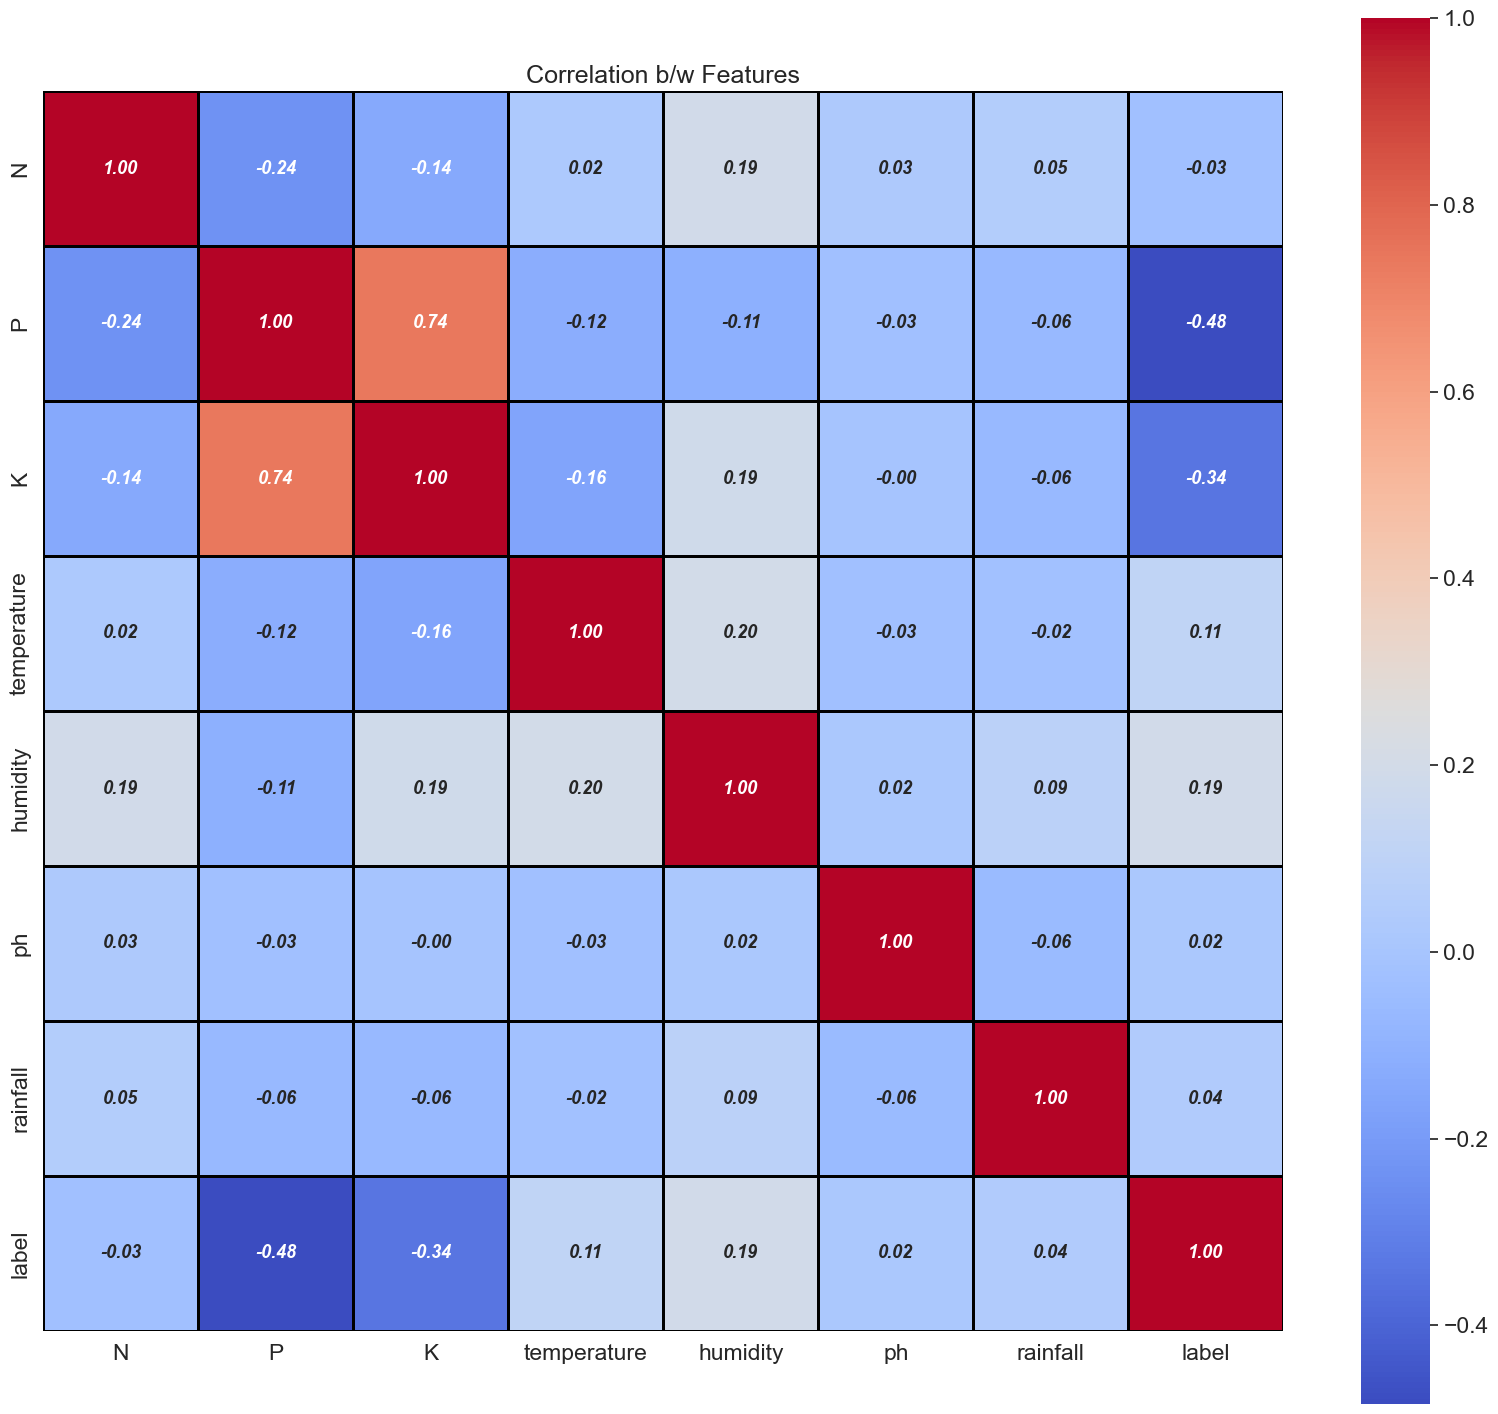

In [35]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,18))
sns.heatmap(tc, annot=True, square = True, fmt= '.2f',cmap= 'coolwarm',
            linewidths=1, annot_kws={'fontsize': 13, 'fontstyle':'italic', 'fontweight':'bold'},
            linecolor='black') 
# annot_kws is used to change the text properties, typically the font size ,
# fmt(format) means adding text to each on each cell and .2f is used for placement of 2 digits after decimal
plt.title('Correlation b/w Features')
plt.show()

In [36]:
y=data['label']
print(y)
x= data.drop('label', axis=1)
x

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32


,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536
1,85.0,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537
2,60.0,55.000000,49.318848,23.004459,82.320763,7.840207,263.964248
3,74.0,35.000000,40.000000,26.491096,80.158363,6.980401,0.000000
4,78.0,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.000000,32.000000,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.000000,27.000000,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.000000,30.000000,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.000000,34.000000,26.272418,52.127394,6.758793,127.175293


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

### Logistic Regression

In [38]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train, y_train)

c:\Users\dell\anaconda3\envs\Crop-Recommendation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred_LR = Log_Reg.predict(x_test)
y_pred_LR[:10]

array([20,  3, 17, 14,  3, 18,  2, 21,  5,  2])

In [40]:
Log_Reg_Test_Accuracy = accuracy_score(y_test, y_pred_LR)
print ('Log Reg Test Accuracy:', Log_Reg_Test_Accuracy)

Log_Reg_Test_F1 = f1_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test F1 score:', Log_Reg_Test_F1)

Log_Reg_Test_Precision = precision_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test Precision score:', Log_Reg_Test_Precision)

Log_Reg_Test_Recall = recall_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test Recall score:', Log_Reg_Test_Recall)

Log Reg Test Accuracy: 0.9068181818181819
Log Reg Test F1 score: 0.9049672085426695
Log Reg Test Precision score: 0.9055376103451828
Log Reg Test Recall score: 0.9068181818181819


In [41]:
Log_Reg_cm = confusion_matrix(y_test, y_pred_LR)
print(Log_Reg_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  1  2  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  1  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 20  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  1  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  2  9  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [42]:
report = classification_report(y_test, y_pred_LR)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.86      1.00      0.92        18
           2       0.71      0.71      0.71        21
           3       0.97      0.97      0.97        29
           4       1.00      1.00      1.00        20
           5       0.91      0.95      0.93        21
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        24
           8       0.84      0.73      0.78        22
           9       1.00      0.93      0.97        15
          10       0.87      0.91      0.89        22
          11       0.82      0.75      0.78        24
          12       0.86      0.95      0.90        20
          13       0.64      0.53      0.58        17
          14       1.00      0.93      0.97        15
          15       0.94      1.00      0.97        17
          16       1.00      1.00      1.00        16
          17       0.90    

In [43]:
y_train_pred_LR = Log_Reg.predict(x_train)
y_train_pred_LR[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [44]:
Log_Reg_Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
print ('Log Reg Train Accuracy:', Log_Reg_Train_Accuracy)

Log_Reg_Train_F1 = f1_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train F1 score:', Log_Reg_Train_F1)

Log_Reg_Train_Precision = precision_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train Precision score:', Log_Reg_Train_Precision)

Log_Reg_Train_Recall = recall_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train Recall score:', Log_Reg_Train_Recall)

Log Reg Train Accuracy: 0.9306818181818182
Log Reg Train F1 score: 0.930597235239326
Log Reg Train Precision score: 0.9313165828041764
Log Reg Train Recall score: 0.9306818181818182


### SVM Classifier

In [45]:
SVM_class = SVC(C=12.0, kernel = 'poly', gamma='scale')
SVM_class.fit(x_train, y_train)

SVC(C=12.0, kernel='poly')

In [46]:
y_pred_SVM = SVM_class.predict(x_test)
y_pred_SVM[:10]

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13])

In [47]:
SVM_Test_Accuracy = accuracy_score(y_test, y_pred_SVM )
print ('SVM Test Accuracy:', SVM_Test_Accuracy)

SVM_Test_F1 = f1_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test F1 score:', SVM_Test_F1)

SVM_Test_Precision = precision_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test Precision score:', SVM_Test_Precision)

SVM_Test_Recall = recall_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test Recall score:', SVM_Test_Recall)

SVM Test Accuracy: 0.975
SVM Test F1 score: 0.974896902795958
SVM Test Precision score: 0.9755632411067193
SVM Test Recall score: 0.975


In [48]:
SVM_cm = confusion_matrix(y_test, y_pred_SVM)
print(SVM_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 17  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [49]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.91      1.00      0.95        21
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.85      0.77      0.81        22
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        22
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

### Decision Tree Classifier

In [50]:
DT = DecisionTreeClassifier(criterion='gini', min_samples_split=2,
    min_samples_leaf=1, random_state=2, splitter='random')
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2, splitter='random')

In [51]:
y_pred_DT = DT.predict(x_test)
y_pred_DT[:10]

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13])

In [52]:
DT_Test_Accuracy = accuracy_score(y_test, y_pred_DT)
print ('DT Test Accuracy:', DT_Test_Accuracy)

DT_Test_F1 = f1_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test F1 score:', DT_Test_F1)

DT_Test_Precision = precision_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test Precision score:', DT_Test_Precision)

DT_Test_Recall = recall_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test Recall score:', DT_Test_Recall)

DT Test Accuracy: 0.9363636363636364
DT Test F1 score: 0.9353962094825132
DT Test Precision score: 0.9380966714906802
DT Test Recall score: 0.9363636363636364


In [53]:
DT_report = classification_report(y_test, y_pred_DT)
print(DT_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        29
           4       0.87      1.00      0.93        20
           5       0.95      0.95      0.95        21
           6       0.89      1.00      0.94        16
           7       1.00      1.00      1.00        24
           8       0.95      0.91      0.93        22
           9       1.00      1.00      1.00        15
          10       0.82      0.82      0.82        22
          11       0.91      0.83      0.87        24
          12       1.00      1.00      1.00        20
          13       0.79      0.88      0.83        17
          14       0.87      0.87      0.87        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       0.94    

In [54]:
DT_cm = confusion_matrix(y_test, y_pred_DT)
print(DT_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 18  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0 20  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0

In [55]:
y_train_pred_DT = DT.predict(x_train)
y_train_pred_DT[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [56]:
DT_Train_Accuracy = accuracy_score(y_train, y_train_pred_DT)
print ('DT Train Accuracy:', DT_Train_Accuracy)

DT_Train_F1 = f1_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train F1 score:', DT_Train_F1)

DT_Train_Precision = precision_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train Precision score:', DT_Train_Precision)

DT_Train_Recall = recall_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train Recall score:', DT_Train_Recall)

DT Train Accuracy: 1.0
DT Train F1 score: 1.0
DT Train Precision score: 1.0
DT Train Recall score: 1.0


### Random Forest Classifier

In [57]:
RF_classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 0)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=0)

In [58]:
y_pred_RF = RF_classifier.predict(x_test)
y_pred_RF[:10]

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13])

In [59]:
RF_Test_Accuracy = accuracy_score(y_test, y_pred_RF)
print ('RF Test Accuracy:', RF_Test_Accuracy)

RF_Test_F1 = f1_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test F1 score:', RF_Test_F1)

RF_Test_Precision = precision_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test Precision score:', RF_Test_Precision)

RF_Test_Recall = recall_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test Recall score:', RF_Test_Recall)

RF Test Accuracy: 0.9886363636363636
RF Test F1 score: 0.9886199836199836
RF Test Precision score: 0.9887077294685991
RF Test Recall score: 0.9886363636363636


In [60]:
RF_cm = confusion_matrix(y_test, y_pred_RF)
print(RF_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [61]:
RF_report = classification_report(y_test, y_pred_RF)
print(RF_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        24
           8       0.91      0.95      0.93        22
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        22
          11       0.96      0.96      0.96        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

In [62]:
y_train_pred_RF = RF_classifier.predict(x_train)
y_train_pred_RF[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [63]:
RF_Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
print ('RF Train Accuracy:', RF_Train_Accuracy)

RF_Train_F1 = f1_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train F1 score:', RF_Train_F1)

RF_Train_Precision = precision_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train Precision score:', RF_Train_Precision)

RF_Train_Recall = recall_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train Recall score:', RF_Train_Recall)

RF Train Accuracy: 1.0
RF Train F1 score: 1.0
RF Train Precision score: 1.0
RF Train Recall score: 1.0


### Gradient Boosting Classifier

In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [65]:
y_pred_GBC = GBC.predict(x_test)
y_pred_GBC[:10]

array([20,  9, 17, 14, 13, 18, 13, 21,  5, 13])

In [66]:
GBC_Test_Accuracy = accuracy_score(y_test, y_pred_GBC)
print ('GBC Test Accuracy:', GBC_Test_Accuracy)

GBC_Test_F1 = f1_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test F1 score:', GBC_Test_F1)

GBC_Test_Precision = precision_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test Precision score:', GBC_Test_Precision)

GBC_Test_Recall = recall_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test Recall score:', GBC_Test_Recall)

GBC Test Accuracy: 0.9727272727272728
GBC Test F1 score: 0.9727961982295458
GBC Test Precision score: 0.9739498841801473
GBC Test Recall score: 0.9727272727272728


In [67]:
GBC_cm = confusion_matrix(y_test, y_pred_GBC)
print(GBC_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [68]:
GBC_report = classification_report(y_test, y_pred_GBC)
print(GBC_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       0.88      1.00      0.93        21
           3       1.00      0.93      0.96        29
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.90      0.86      0.88        22
           9       0.94      1.00      0.97        15
          10       1.00      0.95      0.98        22
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        20
          13       0.94      0.88      0.91        17
          14       1.00      1.00      1.00        15
          15       0.94      1.00      0.97        17
          16       1.00      1.00      1.00        16
          17       1.00    

In [69]:
y_train_pred_GBC = GBC.predict(x_train)
y_train_pred_GBC[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [70]:
GBC_Train_Accuracy = accuracy_score(y_train, y_train_pred_GBC)
print ('GBC Train Accuracy:', GBC_Train_Accuracy)

GBC_Train_F1 = f1_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train F1 score:', GBC_Train_F1)

GBC_Train_Precision = precision_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train Precision score:', GBC_Train_Precision)

GBC_Train_Recall = recall_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train Recall score:', GBC_Train_Recall)

GBC Train Accuracy: 1.0
GBC Train F1 score: 1.0
GBC Train Precision score: 1.0
GBC Train Recall score: 1.0


### XGBoost Classifier

In [71]:
xg = XGBClassifier( n_estimators=120, max_depth=5, n_jobs=-1,random_state=5)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=120,
              n_jobs=-1, num_parallel_tree=None, ...)

In [72]:
y_pred_xg = xg.predict(x_test)
y_pred_xg[:10]

array([20,  9, 17, 14,  3, 18, 13, 21,  5, 13], dtype=int64)

In [73]:
Xg_Test_Accuracy = accuracy_score(y_test, y_pred_xg)
print ('Xg Test Accuracy:', Xg_Test_Accuracy)

Xg_Test_F1 = f1_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test F1 score:', Xg_Test_F1)

Xg_Test_Precision = precision_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test Precision score:', Xg_Test_Precision)

Xg_Test_Recall = recall_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test Recall score:', Xg_Test_Recall)

Xg Test Accuracy: 0.9818181818181818
Xg Test F1 score: 0.981785522754949
Xg Test Precision score: 0.9822858864620229
Xg Test Recall score: 0.9818181818181818


In [74]:
xg_cm = confusion_matrix(y_test, y_pred_xg)
print(xg_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 22  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [75]:
xg_report = classification_report(y_test, y_pred_xg)
print(xg_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.98        21
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.95      0.91      0.93        22
           9       0.94      1.00      0.97        15
          10       1.00      0.95      0.98        22
          11       0.96      0.92      0.94        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

In [76]:
y_train_pred_xg = xg.predict(x_train)
y_train_pred_xg[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12], dtype=int64)

In [77]:
#Evaluation for train data
Xg_Train_Accuracy = accuracy_score(y_train, y_train_pred_xg)
print ('Xg Train Accuracy:', Xg_Train_Accuracy)

Xg_Train_F1 = f1_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train F1 score:', Xg_Train_F1)

Xg_Train_Precision = precision_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train Precision score:', Xg_Train_Precision)

Xg_Train_Recall = recall_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train Recall score:', Xg_Train_Recall)

Xg Train Accuracy: 1.0
Xg Train F1 score: 1.0
Xg Train Precision score: 1.0
Xg Train Recall score: 1.0


- Based on the evaluation of results from the various moodels built, we select the Random Forest model as the best model for our case.
- So Lets create a pickle fle and save the model to a local pickle file so as to deploy it later.

# Predictive System

In [78]:
# Define function to make predictions
def predict_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Create a numpy array with the input values
    input_values = np.array([[N, P, K, temperature, humidity, pH, rainfall]])
    
    # Use the model to make a prediction
    prediction = RF_classifier.predict(input_values)
    
    # Return the predicted crop label
    return prediction[0]


In [79]:
N = 21
P = 26
K = 27
tem = 27.003155
humidity = 47.675254
ph = 5.699587
rainfall = 95.851183

pred = predict_crop(N, P, K, tem, humidity, ph, rainfall)

if pred == 1:
    print("Rice is the best crop to be cultivated right there")
elif pred == 2:
    print("Maize is the best crop to be cultivated right there")
elif pred == 3:
    print("Jute is the best crop to be cultivated right there")
elif pred == 4:
    print("Cotton is the best crop to be cultivated right there")
elif pred == 5:
    print("Coconut is the best crop to be cultivated right there")
elif pred == 6:
    print("Papaya is the best crop to be cultivated right there")
elif pred == 7:
    print("Orange is the best crop to be cultivated right there")
elif pred == 8:
    print("Apple is the best crop to be cultivated right there")
elif pred == 9:
    print("Muskmelon is the best crop to be cultivated right there")
elif pred == 10:
    print("Watermelon is the best crop to be cultivated right there")
elif pred == 11:
    print("Grapes is the best crop to be cultivated right there")
elif pred == 12:
    print("Mango is the best crop to be cultivated right there")
elif pred == 13:
    print("Banana is the best crop to be cultivated right there")
elif pred == 14:
    print("Pomegranate is the best crop to be cultivated right there")
elif pred == 15:
    print("Lentil is the best crop to be cultivated right there")
elif pred == 16:
    print("Blackgram is the best crop to be cultivated right there")
elif pred == 17:
    print("Mungbean is the best crop to be cultivated right there")
elif pred == 18:
    print("Mothbeans is the best crop to be cultivated right there")
elif pred == 19:
    print("Pigeonpeas is the best crop to be cultivated right there")
elif pred == 20:
    print("Kidneybeans is the best crop to be cultivated right there")
elif pred == 21:
    print("Chickpea is the best crop to be cultivated right there")
elif pred == 22:
    print("Coffee is the best crop to be cultivated right there")
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")


Mango is the best crop to be cultivated right there


c:\Users\dell\anaconda3\envs\Crop-Recommendation\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
import pickle 

In [81]:
import pickle

# Load the model
with open('RF_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Print feature names used during training
print(model.feature_names_in_)

# with open('RF_classifier.pkl', 'wb') as f:
#     pickle.dump(RF_classifier, f)
# pickle_out = open('RF_classifier.pkl', 'wb')
# pkl.dump(Crop_Mappings, pickle_out)
# pkl.dump(RF_classifier, pickle_out)
# pickle_out.close()

['N' 'P' 'K' 'temperature' 'humidity' 'ph' 'rainfall']
